In [67]:
using Polynomials
using SpecialPolynomials
using Plots
using LinearAlgebra
using CSV
using DataFrames
using Statistics

## ZAD 1
Narysować 6 pierwszych wielomianów Hermita (na jednym wykresie albo siatce 2x3 lub 3x2)

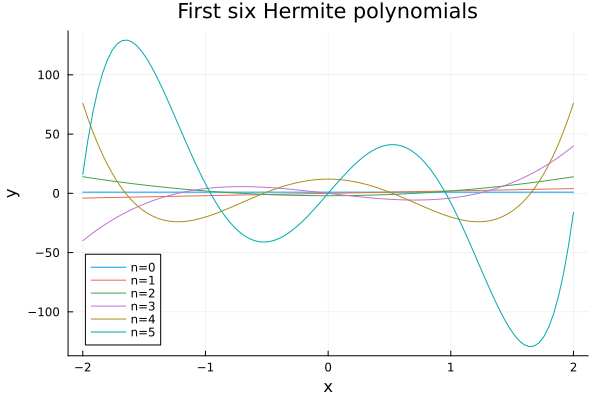

In [68]:
base = [1]
plot(Hermite(base), -2, 2, label="n=0")

for n in 1:5
    base = [0 for _ in 1:n]
    push!(base, 1)
    h = Hermite(base)
    plot!(h, -2, 2, label="n=$n")
end

xlabel!("x")
ylabel!("y")
title!("First six Hermite polynomials")

## ZAD 2
Narysować 6 pierwszych funkcji bazowych

In [69]:
function base_fun(k, x, norm=true)
    H_k = basis(Hermite, k).(x)
    app = H_k .* exp.(-(x.^2/2))
    # normalize
    if norm
        return normalize(app)
    end
    return app
end;

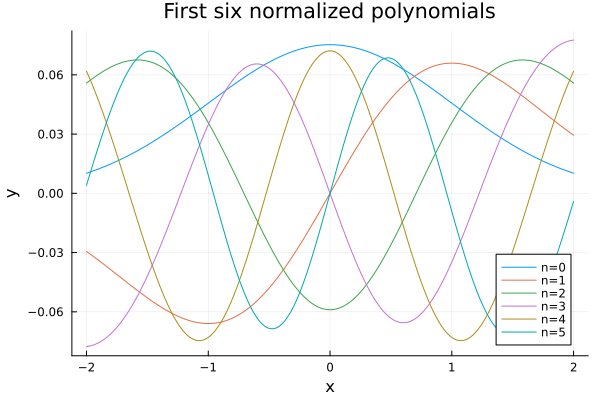

In [70]:
xx = -2:0.01:2
plot(xx, base_fun(0, xx), label="n=0")

for n in 1:5
    plot!(xx, base_fun(n, xx), label="n=$n")
end

xlabel!("x")
ylabel!("y")
title!("First six normalized polynomials")

## ZAD3
Pokazać, że same wielomiany nie są ortogonane, ale już z funkcją wagową $exp(-x^2)$ są. Uzyć metody z wektorami wartości, założyć pewien przedział.

In [71]:
function base_h(k, x, norm=true)
    H_k = basis(Hermite, k).(x)
    return H_k
end;

In [72]:
H = [base_h(i, xx) for i in 0:5];
F_wage = [base_fun(i, xx) for i in 0:5];


In [73]:
not_wage = Array{Float64, 2}(undef, 6, 6)
for (i, f_i) in enumerate(H) 
    for (j, f_j) in enumerate(H)
        not_wage[i,j] = dot(f_i, f_j)
    end
end
not_wage

6×6 Matrix{Float64}:
  401.0               1.06581e-14  …   -243.467            -2.91323e-13
    1.06581e-14    2149.36               -5.68434e-14  -47601.8
 1347.36              0.0             15610.6              -1.93268e-12
   -1.42109e-14    7840.69                1.81899e-12      -2.54966e5
 -243.467            -5.68434e-14         1.85037e5         9.09495e-13
   -2.91323e-13  -47601.8          …      9.09495e-13       1.85952e6

In [74]:
wage = Array{Float64, 2}(undef, 6, 6)
for (i, f_i) in enumerate(F_wage) 
    for (j, f_j) in enumerate(F_wage)
        wage[i,j] = dot(f_i, f_j)
    end
end
wage

6×6 Matrix{Float64}:
  1.0          -2.81893e-18  -0.0319463    …  -0.0657164    -3.998e-18
 -2.81893e-18   1.0          -4.33681e-18      8.67362e-18  -0.144645
 -0.0319463    -4.33681e-18   1.0             -0.526413     -4.49944e-18
  4.44523e-18  -0.180446      0.0             -3.46945e-18  -0.788302
 -0.0657164     8.67362e-18  -0.526413         1.0          -3.1984e-18
 -3.998e-18    -0.144645     -4.49944e-18  …  -3.1984e-18    1.0

Macierz dla wektorów znormalizowanych jest symetryczna i na przekątnych mamy wartości 1, zatem są one wektorami ortonormalnymi.

## ZAD4
Dokonać aproksymacji zespołu QRS typu N oraz V za pomocą kilku kolejnych stopni. Przedstawić osobno wykresy dla N i V.

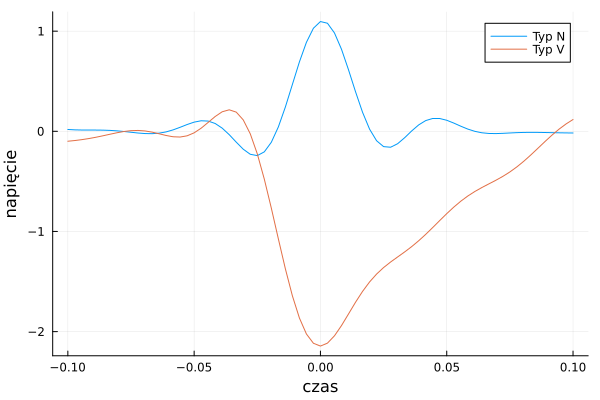

In [75]:
ekg_data = CSV.read("ecg_data.csv", DataFrame);
plot(ekg_data.time, ekg_data.signalN, label="Typ N", xlabel = "czas", ylabel="napięcie")
plot!(ekg_data.time, ekg_data.signalV, label="Typ V")

In [76]:
n = 4;

xx_ekg = ekg_data.time*50;
yy_ekgV = ekg_data.signalV;
yy_ekgN = ekg_data.signalN;


In [77]:
function type_v(n)
    Y = [base_fun(i,xx_ekg) for i in 0:n]
    C = [dot(yy_ekgV, Y[i]) for i in 1:n+1]
    V = [C[i]*Y[i] for i in 1:n+1]
    V_add = [yy_ekgV]
    errors = []
    for i in 2:n+1
        push!(V_add, sum(V[1:i]))
        error = (yy_ekgV - V_add[i-1]).^2
        push!(errors, error)
    end
    return V_add, errors
end;

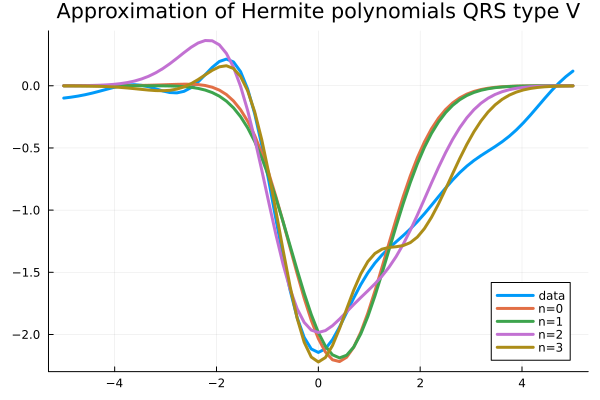

In [78]:
V_add, errors = type_v(n)
yy_ekgV = ekg_data.signalV
# push!(V_add, yy_ekgV)

plot(
    xx_ekg, 
    V_add,
    label = ["data" "n=0" "n=1" "n=2" "n=3" "n=4" "n=5" ],
    linewidth=3,
    title="Approximation of Hermite polynomials QRS type V"
)


In [79]:
function type_n(n)
    Y = [base_fun(i,xx_ekg) for i in 0:n]
    C = [dot(yy_ekgN, Y[i]) for i in 1:n+1]
    V = [C[i]*Y[i] for i in 1:n+1]
    V_add = [yy_ekgN]
    errors = []
    for i in 2:n+1
        push!(V_add, sum(V[1:i]))
        error =mean( (yy_ekgN - V_add[i-1]).^2 )
        push!(errors, error)
    end
    return V_add, errors
end;

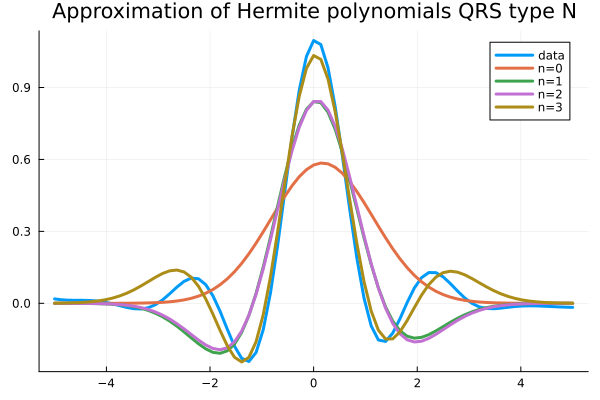

In [80]:
V_add, errors = type_n(n)

plot(
    xx_ekg, 
    V_add,
    label = ["data" "n=0" "n=1" "n=2" "n=3" "n=4" "n=5"],
    linewidth=3,
    title="Approximation of Hermite polynomials QRS type N"
)

## ZAD5 
Przedstawić wykres błędu aproksymacji w zależności od stopnia wielomianu dla stopni od 0 do 10. Jakiego stopnia należy użyć gdybyśmy mieli robić coś dalej z rezultatem aproksymacji?

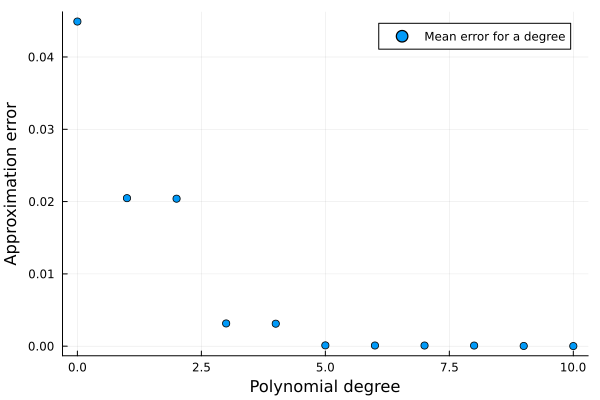

In [86]:
n = 12
res, errors = type_n(n)


scatter(
    0:n-2,
    errors[2:n], 
    label = "Mean error for a degree",
    xlabel="Polynomial degree", 
    ylabel="Approximation error"
)

Wraz ze wzrostem stopnia wielomiany dają coraz lepsze przybliżenia